#**Assignment 1: Multi-layer perceptron**

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as n

##**Data**

Data: CIFAR-10

CIFAR-10  is an established computer-vision dataset used for object recognition. It is a subset of the 80 million tiny images dataset and consists of 60,000 32x32 **color images** containing one of 10 object classes, with 6000 images per class.

Labels are as follows:

airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9)

Source: https://www.kaggle.com/c/cifar-10

### Q1. This dataset has been included in **keras.datasets.cifar10**. Please load the dataset and print the shape of training and testing sets.

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
# Print the shape of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (50000, 32, 32, 3) (50000, 1)
Testing set shape: (10000, 32, 32, 3) (10000, 1)


### Q2. Show the first 9 instances of the training dataset.

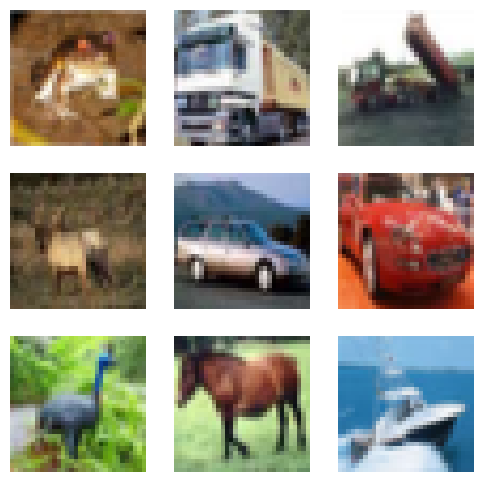

In [5]:
# show the first 9 instances of the training dataset
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

### Q3. Convert the target labels (y) into the one-hot format and show the value (y) for the first instance of the training dataset.

In [6]:
# Convert target labels to one-hot format
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=10)
# Show the value for the first instance of the training dataset
print("One-hot encoded label for the first instance:", y_train_one_hot[0])

One-hot encoded label for the first instance: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### Q4. Create a validation dataset using the first 5,000 instances in the training dataset. Also, divide all input features (X values) in the train/test/validation sets by 255.0. Please show the y value for the first instance of the validation dataset.

In [7]:
# Create validation dataset
X_val = X_train[:5000] / 255.0
y_val = y_train_one_hot[:5000]
X_train = X_train[5000:] / 255.0
y_train_one_hot = y_train_one_hot[5000:]
X_test = X_test / 255.0
# Show the y value for the first instance of the validation dataset
print("One-hot encoded label for the first instance of validation dataset:", y_val[0])

One-hot encoded label for the first instance of validation dataset: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## **Model**

### Q5. Create a multi-layer perceptron model with 200 neurons in the first hidden layer and 100 neurons in the second hidden layer, and print the model summary.

### Please note that the input images are color images with the shape of **32 * 32 * 3**. Here 3 shows RGB.

In [8]:
# Create a multi-layer perceptron model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Print the model summary
model.summary()

/Users/nimeng/PycharmProjects/ISBA_2414/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 635,710 (2.43 MB)

 Trainable params: 635,710 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

### Q6. Create an Adam optimizer with a learning rate of 0.001, compile the model, and fit it on the training and validation datasets. Use the following hyperparameters: **batch_size=512, epochs=20**.

### *Hint*: Adam optimizer can be imported by **keras.optimizers.Adam(learning_rate=0.001)**



In [9]:
# Create Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Fit the model on training and validation datasets
history = model.fit(X_train, y_train_one_hot,
                    validation_data=(X_val, y_val),
                    batch_size=512,
                    epochs=20)


Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2778 - loss: 2.0160 - val_accuracy: 0.3384 - val_loss: 1.8645
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3556 - loss: 1.8196 - val_accuracy: 0.3630 - val_loss: 1.7633
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3853 - loss: 1.7411 - val_accuracy: 0.3830 - val_loss: 1.7196
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4000 - loss: 1.6999 - val_accuracy: 0.4046 - val_loss: 1.6562
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4143 - loss: 1.6548 - val_accuracy: 0.4020 - val_loss: 1.6655
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4317 - loss: 1.6123 - val_accuracy: 0.4220 - val_loss: 1.6004
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4406 - loss: 1.5877 - val_accuracy: 0.4324 - val_loss: 1.5823
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4556 - loss: 1.5540 - val_accuracy: 0.4382 - val_loss

## **Performance**

### Q7. Evaluate your model.

In [10]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, keras.utils.to_categorical(y_test, num_classes=10))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.4894 - loss: 1.4454
Test Loss: 1.445351004600525
Test Accuracy: 0.4893999993801117


### Q8. Show the predicted probabilities for the test dataset.

In [11]:
# Get predicted probabilities for the test dataset
predicted_probabilities = model.predict(X_test)
print("Predicted probabilities for the test dataset:", predicted_probabilities)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step
Predicted probabilities for the test dataset: [[2.22993288e-02 2.40889359e-02 1.64553508e-01 ... 4.21631103e-03
  2.19721664e-02 1.13883009e-03]
 [5.64564690e-02 2.11918622e-01 3.78534454e-03 ... 3.74531897e-04
  2.71923333e-01 4.51262981e-01]
 [2.65347719e-01 1.58463672e-01 1.36561720e-02 ... 1.03613315e-02
  3.79097730e-01 1.51837900e-01]
 ...
 [6.64643419e-04 2.02706535e-04 2.43687809e-01 ... 9.65111628e-02
  4.13813069e-03 8.95893318e-04]
 [9.04977508e-03 4.79658693e-03 1.73436284e-01 ... 3.62471268e-02
  6.07904512e-03 4.85621346e-03]
 [5.72499074e-02 4.90322616e-03 1.44289911e-01 ... 3.35490227e-01
  8.58442951e-03 9.19816643e-03]]


### Q9. Show the predicted labels for the test dataset.


In [13]:
# Get predicted labels for the test dataset
import numpy as np
predicted_labels = np.argmax(predicted_probabilities, axis=1)
print("Predicted labels for the test dataset:", predicted_labels)

Predicted labels for the test dataset: [3 9 8 ... 5 6 4]


### Q10. Show the confusion matrix.


Confusion Matrix:
 [[518  70  77  14  24  12  48  30 155  52]
 [ 25 691  18  15   9  16  27  18  66 115]
 [ 63  38 372  72 125  54 176  54  28  18]
 [ 30  46 109 261  60 159 207  42  33  53]
 [ 51  22 155  35 402  27 194  67  30  17]
 [ 21  30 107 180  72 320 168  47  29  26]
 [  6  27  60  50  95  37 688  12  13  12]
 [ 37  38  73  56 104  62  65 494  16  55]
 [ 90 102  19  23  29  18  22  15 634  48]
 [ 30 249  16  22  18  22  28  40  61 514]]


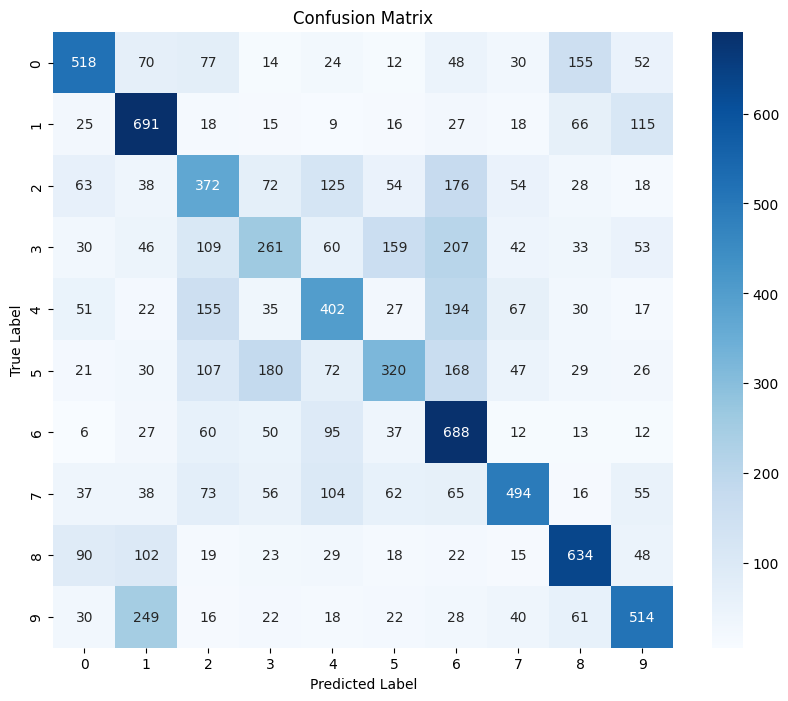

In [18]:
# Show the confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)
# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## **Post-analysis**

### Q11. Plot the loss and accuracy for the training and validation sets.


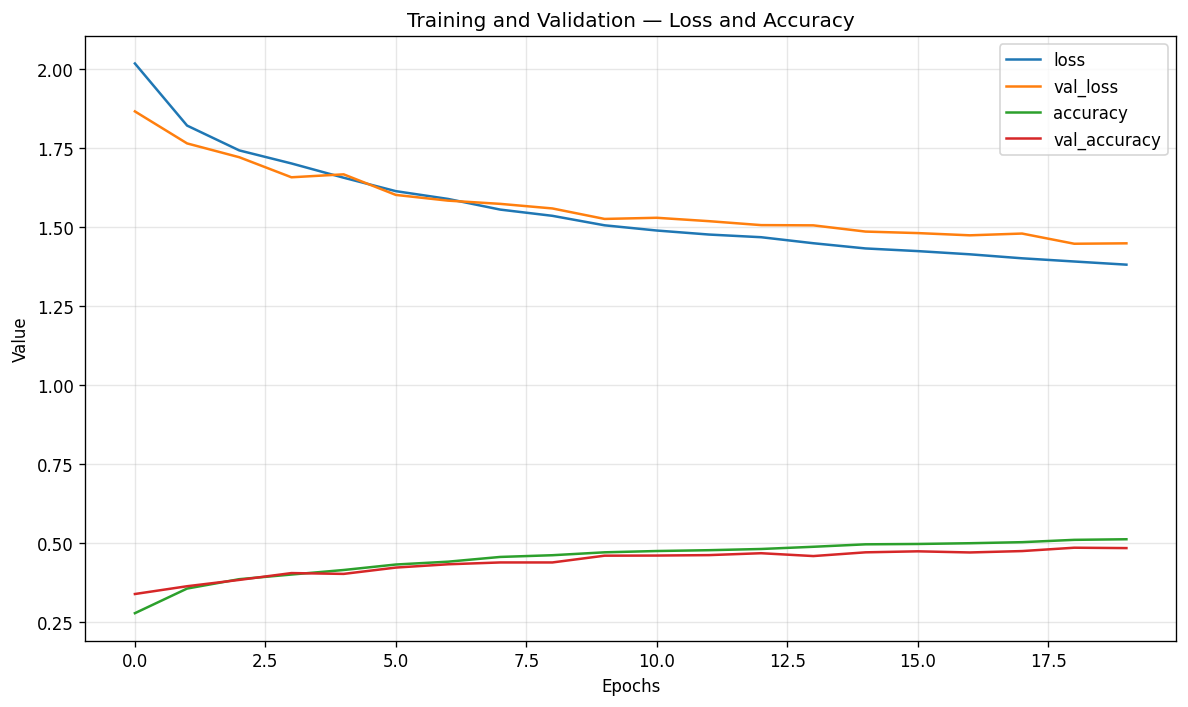

In [23]:
plt.figure(figsize=(10,6), dpi=120)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')

plt.title('Training and Validation — Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Q12. Show the first 9 images that the actual value is different from the predicted value.

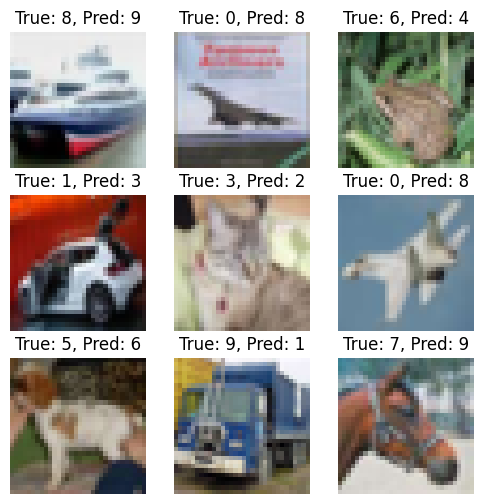

In [24]:
# Show the first 9 images with incorrect predictions
incorrect_indices = np.where(y_test.flatten() != predicted_labels)[0]
plt.figure(figsize=(6,6))
for i, index in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index])
    plt.title(f'True: {y_test[index][0]}, Pred: {predicted_labels[index]}')
    plt.axis('off')
plt.show()
